In [19]:
import os
import matplotlib.pyplot as plt
import cv2
import re
import numpy as np
import pandas as pd
import datetime

In [94]:
def load_images_from_folder(folder, cutUruguay = True):
    '''
    Input:
    folder: path y nombre de la carpeta con las imagenes 
    numeric_name: borrar letras de los nombres de las imagenes al cargar a la lista
    cutUruguay: si True recorta la region de Uruguay al cargar 
    Output:
    images: lista con las imagenes cargadas
    time_stamp: lista datetime de las imagenes'''
    images = []
    time_stamp = []
    dia_ref = datetime.datetime(2019,12,31)
    for filename in os.listdir(folder):
        img = cv2.imread(os.path.join(folder, filename))
        if img is not None:
            if (cutUruguay):
                images.append(img[67:185,109:237,0])
                
            else:
                images.append(img[:,:,0])
            
            img_name = re.sub("[^0-9]", "", filename)
            dt_image = dia_ref + datetime.timedelta(days=int(img_name[4:7]), hours =int(img_name[7:9]),
                        minutes = int(img_name[9:11]), seconds = int(img_name[11:]) )
            time_stamp.append(dt_image)
            

    return images,time_stamp


In [95]:
images_20, timestamp_20 = load_images_from_folder('data/images/dia_20',cutUruguay = True)
#images_91,_ = load_images_from_folder('data/images/dia_91', True)
#images_277, _ = load_images_from_folder('data/images/dia_277', True)
#images_305, _ = load_images_from_folder('data/images/dia_305', True)

In [88]:
print(timestamp_20[2])

2020-01-20 00:20:17


In [39]:
def persistencia (images):
    length = len(images)
    errors_matrix = np.ones((length,30))*255
    for i in range(length):
        prediccion = images[i]
        for j in range(i+1,i+31):
            if (j < length):
                errors_matrix[i,j-i-1] =  np.sqrt(np.mean((prediccion - images[j])**2))
    
    return errors_matrix


In [96]:
errores20 = persistencia(images_20)

In [99]:
def grafica_errores (matriz_errores):
    fig, (ax1,ax2) = plt.subplots(figsize=(13, 3), ncols=2)
    grafica = ax1.imshow(matriz_errores, interpolation='none')
    #grafica = ax1.imshow(errores20[70:100], interpolation='none')
    fig.colorbar(grafica, ax=ax1)
    ax1.title.set_text('RMSE en un dia')
    ax1.set_xlabel('Prediccion ') 
    ax1.set_ylabel('Hora del dia')
    ax2.plot(range(0,np.shape(errores20)[1]),np.mean(matriz_errores[70:100],axis=0) , "r.")
    ax2.title.set_text('Promedio errores de persistencia')
    ax2.set_xlabel('Tiempo (minutos)') 
    ax2.set_ylabel('RMSE') 
    plt.show()

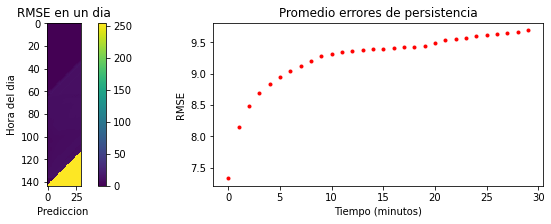

In [100]:
#print(errores20)

# fig = plt.figure(figsize=(10, 5))
# plt.imshow(errores20)
# fig.colorbar(errores20,ax1)
# plt.xlabel('Tiempo (minutos)') 
# plt.ylabel('RMSE') 
# plt.title('RMSE persistencia') 
# plt.show()


grafica_errores(errores20)


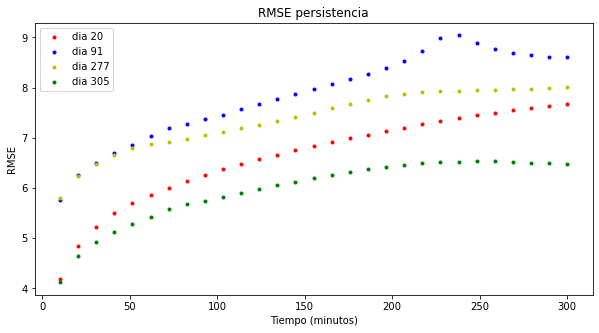

In [4]:
i0 =80

prediccion20 = images_20[i0]
prediccion91 = images_91[i0]
prediccion277 = images_277[i0]
prediccion305 = images_305[i0]

errores20 = []
errores91 = []
errores277 = []
errores305 = []

for i in range(len(images_20)):
    for i in range(i, i+30):
        rmse20 = np.sqrt(np.mean((images_20[i] - prediccion20)**2))
        rmse91 = np.sqrt(np.mean((images_91[i] - prediccion91)**2))
        rmse277 = np.sqrt(np.mean((images_277[i] - prediccion277)**2))
        rmse305 = np.sqrt(np.mean((images_305[i] - prediccion305)**2))
        errores20.append(rmse20)
        errores91.append(rmse91)
        errores277.append(rmse277)
        errores305.append(rmse305)
        

    tiempo = np.linspace(10,300,29)

    plt.figure(figsize=(10, 5))
    #plt.plot(tiempo,errores20, 'r.',tiempo,errores91,'b.',tiempo,errores277,'y.',tiempo,errores305,'g.')
    l1, = plt.plot(tiempo,errores20, 'r.')
    l2, = plt.plot(tiempo,errores91 ,'b.')
    l3, = plt.plot(tiempo,errores277 ,'y.')
    l4, = plt.plot(tiempo,errores305 ,'g.')
    plt.legend((l1, l2, l3,l4), ['dia 20', 'dia 91','dia 277','dia 305'])
    plt.xlabel('Tiempo (minutos)') 
    plt.ylabel('RMSE') 
    plt.title('RMSE persistencia') 
    plt.show()